In [1]:
## Importing Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
sns.set_style("whitegrid")

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading Data

In [2]:
df = pd.read_csv("./data/data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
## Drop or delete not important data
col_del = ["id", "Unnamed: 32"]
df = df.drop(df[col_del], axis = 1)

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
## Data Transform from objective type to numerical type
le = LabelEncoder()
df["diag_label"] = le.fit_transform(df["diagnosis"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diag_label
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [7]:
## Delete the data
df = df.drop("diagnosis", axis = 1)

In [8]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diag_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [9]:
## Checking data type
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

## Analysis Mean Feature

<AxesSubplot:>

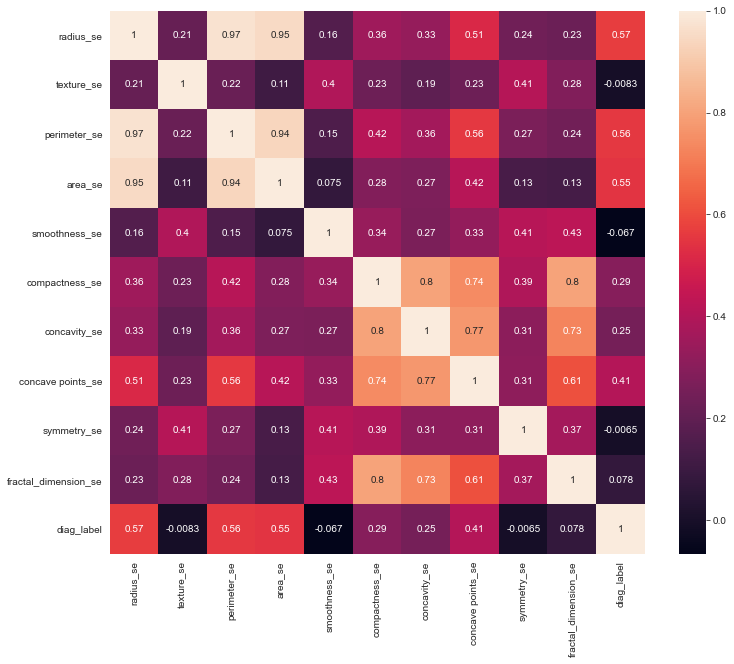

In [10]:
## Select and analyze features
col_se = ["radius_se","texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se","diag_label"]
df[col_se].corr()
plt.figure(figsize = (12,10))
sns.heatmap(df[col_se].corr(), annot = True)

radius_mean                AxesSubplot(0.125,0.71587;0.168478x0.16413)
texture_mean            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
perimeter_mean          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
area_mean               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoothness_mean           AxesSubplot(0.125,0.518913;0.168478x0.16413)
compactness_mean       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
concavity_mean         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
concave points_mean    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
diag_label                AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

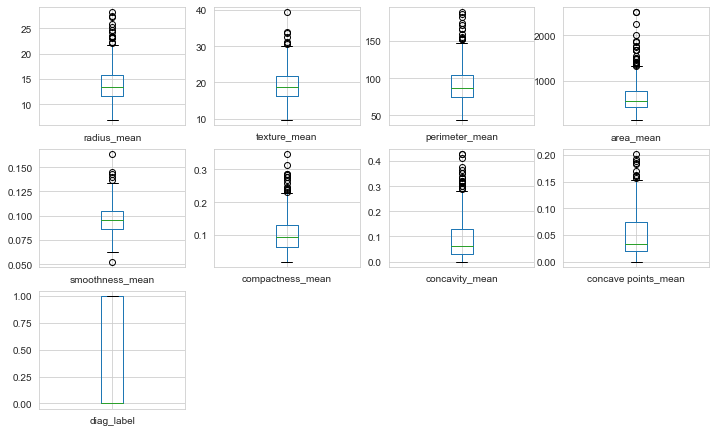

In [11]:
col_mean = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean","diag_label"]
df[col_mean].plot(kind = "box", subplots = True, layout = (4,4), figsize = (12,10))

<AxesSubplot:>

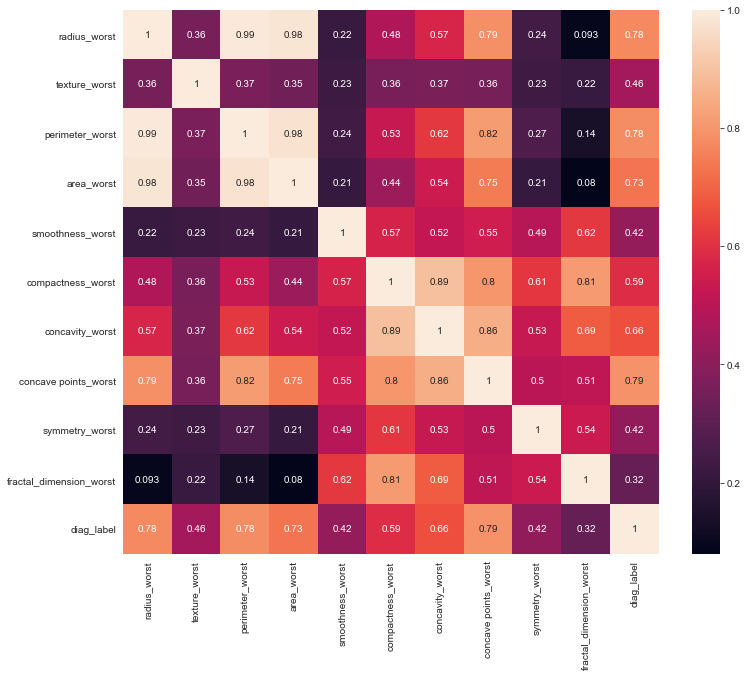

In [12]:
col_worst = ["radius_worst","texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst","diag_label"]
df[col_worst].corr()
plt.figure(figsize = (12,10))
sns.heatmap(df[col_worst].corr(), annot = True)

radius_se                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
texture_se               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
perimeter_se             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
area_se                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoothness_se              AxesSubplot(0.125,0.518913;0.168478x0.16413)
compactness_se          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
concavity_se            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
concave points_se       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
symmetry_se                AxesSubplot(0.125,0.321957;0.168478x0.16413)
fractal_dimension_se    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
diag_label              AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

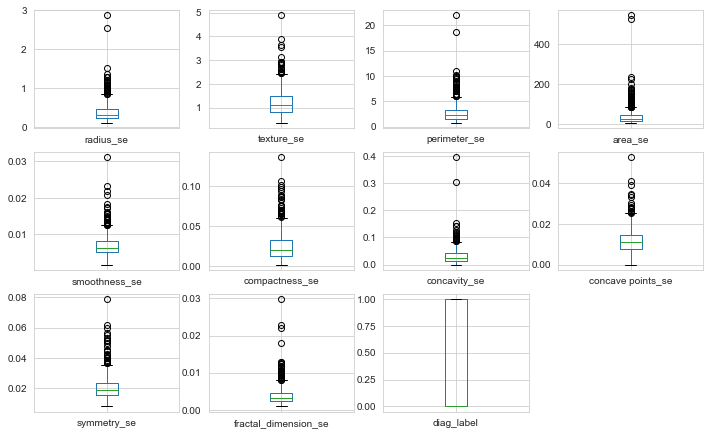

In [13]:
df[col_se].plot(kind = "box", subplots = True, layout = (4,4), figsize = (12,10))

<AxesSubplot:>

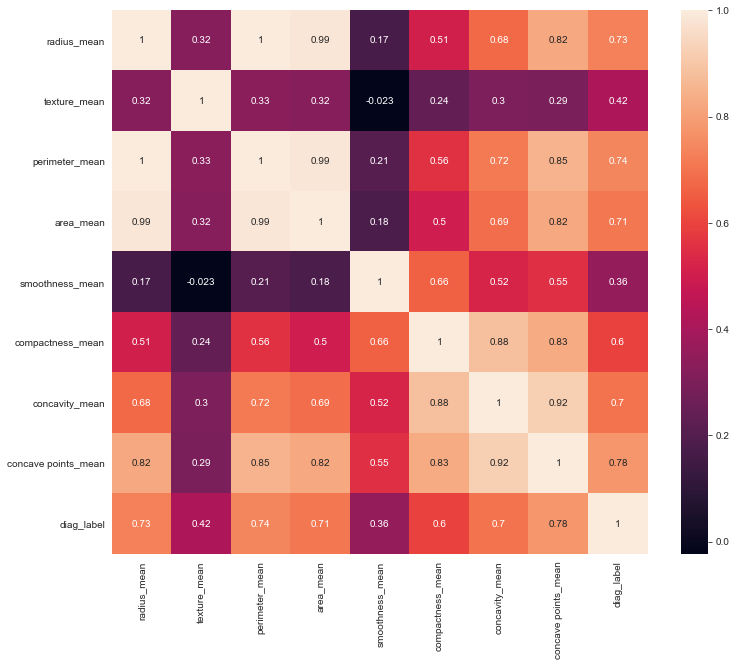

In [14]:
col_se = ["radius_mean","texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean","diag_label"]
df[col_mean].corr()
plt.figure(figsize = (12,10))
sns.heatmap(df[col_mean].corr(), annot = True)

radius_worst                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
texture_worst               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
perimeter_worst             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
area_worst                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoothness_worst              AxesSubplot(0.125,0.518913;0.168478x0.16413)
compactness_worst          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
concavity_worst            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
concave points_worst       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
symmetry_worst                AxesSubplot(0.125,0.321957;0.168478x0.16413)
fractal_dimension_worst    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
diag_label                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

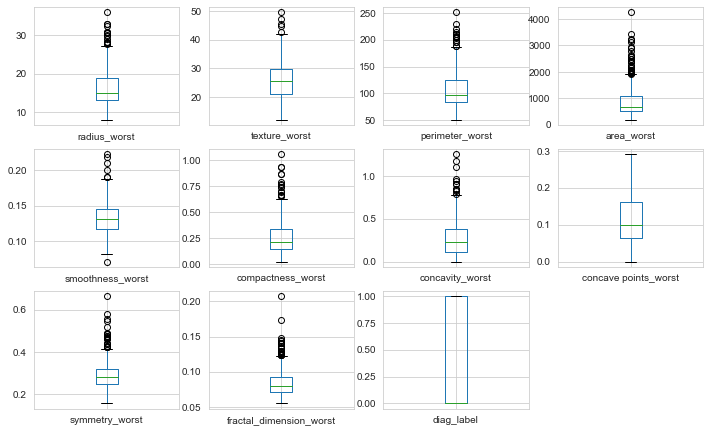

In [15]:
df[col_worst].plot(kind = "box", subplots = True, layout = (4,4), figsize = (12,10))

In [16]:
## Create new data containing selected features
col_select = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean","perimeter_worst","concave points_worst","area_worst","diag_label"]
df = df.loc[:,col_select]

In [17]:
df

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,concave points_worst,area_worst,diag_label
0,17.99,122.80,1001.0,0.30010,0.14710,184.60,0.2654,2019.0,1
1,20.57,132.90,1326.0,0.08690,0.07017,158.80,0.1860,1956.0,1
2,19.69,130.00,1203.0,0.19740,0.12790,152.50,0.2430,1709.0,1
3,11.42,77.58,386.1,0.24140,0.10520,98.87,0.2575,567.7,1
4,20.29,135.10,1297.0,0.19800,0.10430,152.20,0.1625,1575.0,1
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,166.10,0.2216,2027.0,1
565,20.13,131.20,1261.0,0.14400,0.09791,155.00,0.1628,1731.0,1
566,16.60,108.30,858.1,0.09251,0.05302,126.70,0.1418,1124.0,1
567,20.60,140.10,1265.0,0.35140,0.15200,184.60,0.2650,1821.0,1


radius_mean                AxesSubplot(0.125,0.772143;0.110714x0.107857)
perimeter_mean          AxesSubplot(0.257857,0.772143;0.110714x0.107857)
area_mean               AxesSubplot(0.390714,0.772143;0.110714x0.107857)
concavity_mean          AxesSubplot(0.523571,0.772143;0.110714x0.107857)
concave points_mean     AxesSubplot(0.656429,0.772143;0.110714x0.107857)
perimeter_worst         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
concave points_worst       AxesSubplot(0.125,0.642714;0.110714x0.107857)
area_worst              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
diag_label              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
dtype: object

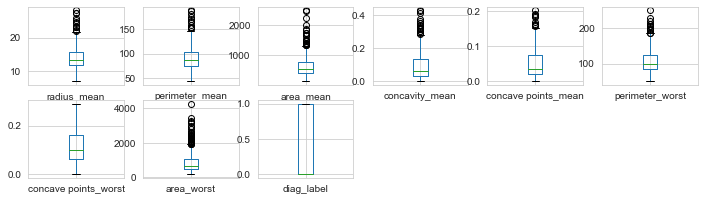

In [18]:
## Checking outliers from data
df.plot(kind = "box", layout = (6,6), subplots = True, figsize=(12,10))

In [19]:
## See number of labels
df["diag_label"].value_counts()

0    357
1    212
Name: diag_label, dtype: int64

In [20]:
## See shape of new dataset
df.shape

(569, 9)

<AxesSubplot:>

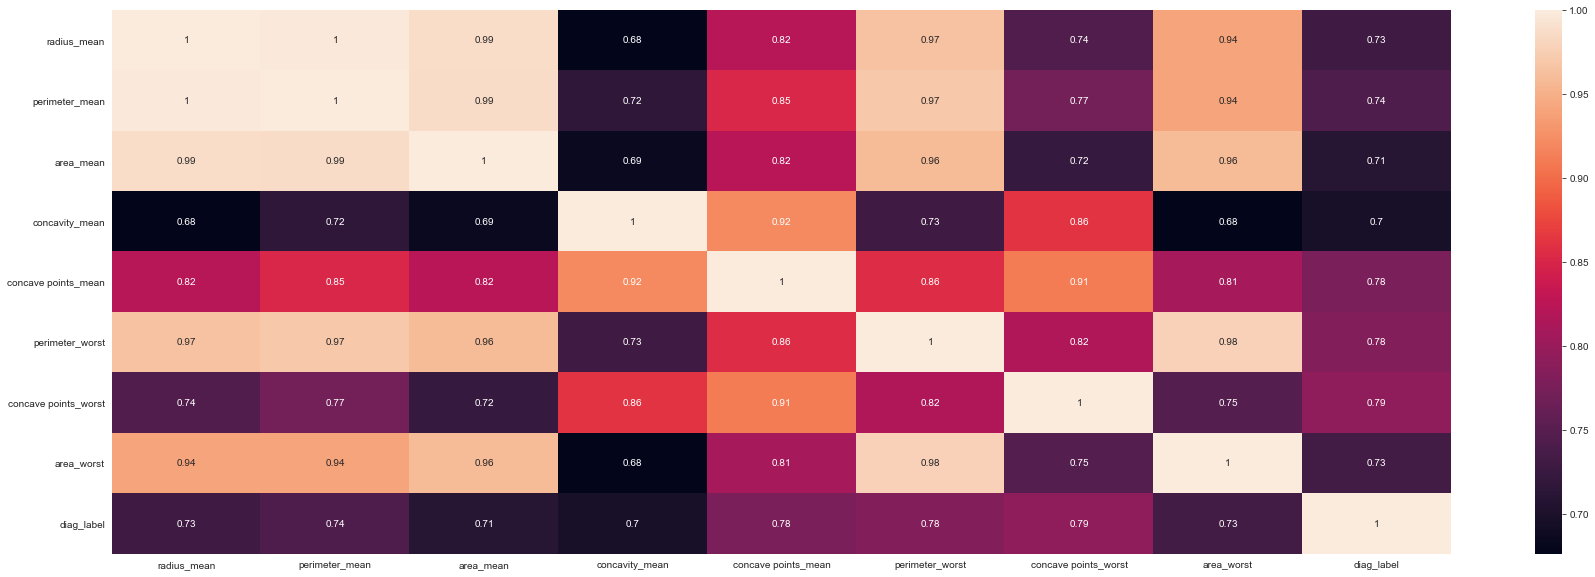

In [21]:
## Analyze correlation from each feature
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(), annot = True)

## Preprocessing

In [23]:
## Create a function to eliminate or minimize outliers using the zscore method
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data = d.copy()
        data = data[(z<i).all(axis = 1)]
        loss = (d.shape[0]-data.shape[0])/d.shape[0]*100
        print("with threshold {} data loss is {}".format(np.round(i,1), np.round(loss,2)))

In [24]:
## shows the option to determine what percentage of outliers will be removed
z = np.abs(zscore(df[df.columns]))
threshold(z,df[df.columns])

with threshold 3.0 data loss is 3.16
with threshold 3.2 data loss is 2.99
with threshold 3.4 data loss is 2.28
with threshold 3.6 data loss is 1.76
with threshold 3.8 data loss is 1.58
with threshold 4.0 data loss is 1.41
with threshold 4.2 data loss is 1.05
with threshold 4.4 data loss is 0.7
with threshold 4.6 data loss is 0.35
with threshold 4.8 data loss is 0.35


In [25]:
## Choose the parameters that have been determined and create a new dataset that contains data that has minimized outliers 
df_zscore = df[(z < 3.4).all(axis = 1)]

In [26]:
df_zscore.dtypes

radius_mean             float64
perimeter_mean          float64
area_mean               float64
concavity_mean          float64
concave points_mean     float64
perimeter_worst         float64
concave points_worst    float64
area_worst              float64
diag_label                int64
dtype: object

In [27]:
print("data before clean = ", df.shape)
print("data after clean = ", df_zscore.shape)

data before clean =  (569, 9)
data after clean =  (556, 9)


In [28]:
df_zscore.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,concave points_worst,area_worst,diag_label
0,17.99,122.80,1001.0,0.3001,0.14710,184.60,0.2654,2019.0,1
1,20.57,132.90,1326.0,0.0869,0.07017,158.80,0.1860,1956.0,1
2,19.69,130.00,1203.0,0.1974,0.12790,152.50,0.2430,1709.0,1
3,11.42,77.58,386.1,0.2414,0.10520,98.87,0.2575,567.7,1
4,20.29,135.10,1297.0,0.1980,0.10430,152.20,0.1625,1575.0,1


## Prepare Data

In [29]:
## Prepare Data
X = df_zscore.drop(["diag_label"], axis = 1)
y = df_zscore["diag_label"]

In [30]:
## Balancing Data and Splitting data
sm = SMOTE(random_state = 2)
Xstrain,Xstest, ystrain,ystest = train_test_split(X,y, test_size = 0.2, random_state =0)
Xsm_train, ysm_train = sm.fit_resample(Xstrain,ystrain)
Xsm_test,ysm_test = sm.fit_resample(Xstest,ystest)

In [31]:
print("y = ", ysm_train.value_counts())

y =  0    283
1    283
Name: diag_label, dtype: int64


In [32]:
## Scalling data
ss = StandardScaler()
xtrain = ss.fit_transform(Xsm_train)
xtest = ss.fit_transform(Xsm_test)

In [33]:
xtest

array([[ 1.02966533,  0.89920269,  0.86965011, ...,  1.03107632,
         0.8978005 ,  0.9992242 ],
       [-0.87056501, -0.89864293, -0.84137534, ..., -0.80983499,
        -0.90537579, -0.77128831],
       [-0.89915945, -0.91309262, -0.87022464, ..., -0.89810164,
        -0.69329637, -0.82754728],
       ...,
       [-0.05586681, -0.01336336, -0.15784595, ...,  0.06893443,
         0.42458585, -0.18672185],
       [ 1.16129749,  1.16444094,  1.13296644, ...,  1.13191969,
         1.35223957,  0.86931375],
       [ 0.64030169,  0.60140769,  0.53360639, ...,  0.46130641,
         0.25943889,  0.4333432 ]])

In [34]:
ysm_train

0      0
1      0
2      1
3      1
4      0
      ..
561    1
562    1
563    1
564    1
565    1
Name: diag_label, Length: 566, dtype: int64

# Making Machine Learning Model
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest

## Logistic Regression

In [35]:
## Setting parameter using gridsearchCV
params = {
    "penalty" : ["l1","l2", "elasticnet","none"],
    "C" : [100,10,1.0,0.1,0.001],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [36]:
g = GridSearchCV(LogisticRegression(), params)

In [37]:
g.fit(xtrain,ysm_train)

/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only '

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [39]:
best_param = g.best_params_

In [40]:
print(best_param)

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
best_log = LogisticRegression(**best_param)

In [42]:
best_log.fit(xtrain,ysm_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [43]:
test = best_log.score(xtest,ysm_test)
train = best_log.score(xtrain,ysm_train)
ypredict = best_log.predict(xtest)


print(test)
print(train)
print("tingkat akurasi = ",accuracy_score(ysm_test,ypredict))

0.9863013698630136
0.9558303886925795
tingkat akurasi =  0.9863013698630136


In [44]:
## testing logistic regression model
print("accuracy score data  = ", accuracy_score(ysm_test,ypredict))

print("================================================================")
print("KLASIFIKASI REPORT")
print("================================================================")
cr1 = classification_report(ysm_test,ypredict)
cm1 = confusion_matrix(ysm_test,ypredict)
print(cr1)
print(cm1)

accuracy score data  =  0.9863013698630136
KLASIFIKASI REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.99      0.99      0.99        73

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[72  1]
 [ 1 72]]


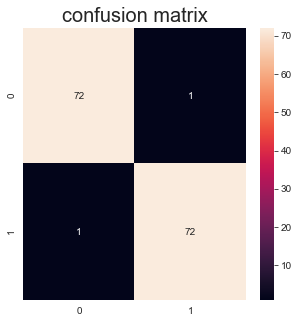

In [45]:
## plotting confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(cm1,annot = True)
plt.title("confusion matrix", fontsize = 20)
plt.show()

## Support Vector Machine (SVM)

In [46]:
## Setting parameter of SVM using GridsearchCv
svm_params = {
    "C" : [0.5, 1, 10],
    "gamma": [0.1, 0.01, 0.001],
    "kernel" : ["linear", "poly", "rbf", "sigmoid"]
}

In [47]:
g1 = GridSearchCV(SVC(), svm_params,cv = 2)

In [48]:
g1.fit(xtrain,ysm_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [49]:
best_param_svm = g1.best_params_
print(best_param_svm)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
best_svm = SVC(**best_param_svm)
best_svm.fit(xtrain,ysm_train)

SVC(C=10, gamma=0.1)

In [51]:
## testing svm model
test_svm = best_svm.score(xtest,ysm_test)
train_svm = best_svm.score(xtrain,ysm_train)
ypredict_svm = best_svm.predict(xtest)


print(test)
print(train)
print("tingkat akurasi = ",accuracy_score(ysm_test,ypredict_svm))

0.9863013698630136
0.9558303886925795
tingkat akurasi =  0.9726027397260274


In [52]:
print("accuracy score data = ", accuracy_score(ysm_test,ypredict_svm))

print("================================================================")
print("KLASIFIKASI REPORT")
print("================================================================")
cr_svm = classification_report(ysm_test,ypredict_svm)
cm_svm = confusion_matrix(ysm_test,ypredict_svm)
print(cr1)
print(cm1)

accuracy score data =  0.9726027397260274
KLASIFIKASI REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.99      0.99      0.99        73

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[72  1]
 [ 1 72]]


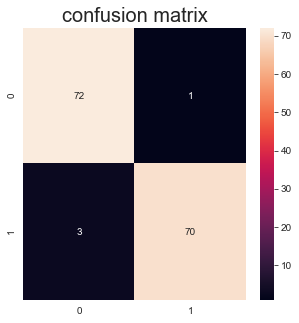

In [53]:
## plotting confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(cm_svm,annot = True)
plt.title("confusion matrix", fontsize = 20)
plt.show()

## Decission Tree

In [54]:
## Settings parameter of Decission Tree using GridparameterCV
dtree_params = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth": [3],
    "min_samples_leaf": [0,5,10]
}

In [55]:
g3 = GridSearchCV(DecisionTreeClassifier(), dtree_params, cv = 3)
g3.fit(xtrain,ysm_train)

/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/muhammadbramansyah/opt/anaconda3/envs/ml_python2021/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3],
                         'min_samples_leaf': [0, 5, 10],
                         'splitter': ['best', 'random']})

In [56]:
print(g3.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'splitter': 'best'}


In [57]:
dtree_best_params = g3.best_params_
dtree = DecisionTreeClassifier(**dtree_best_params)
dtree.fit(xtrain,ysm_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [58]:
score_test = dtree.score(xtest,ysm_test)
score_train = dtree.score(xtrain,ysm_train)

print("testing score = ", score_test)
print("training score = ", score_train)

testing score =  0.9726027397260274
training score =  0.9540636042402827


In [59]:
ypredict_dtree = dtree.predict(xtest)
tingkat_akurasi = accuracy_score(ysm_test,ypredict_dtree)
print("tingkat akurasi  = ", tingkat_akurasi)

print("================================================================")
print("KLASIFIKASI REPORT")
print("================================================================")
cr_dtree = classification_report(ysm_test,ypredict_dtree)
cm_dtree = confusion_matrix(ysm_test,ypredict_dtree)
print(cr_dtree)
print(cm_dtree)

tingkat akurasi  =  0.9726027397260274
KLASIFIKASI REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.96      0.99      0.97        73

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146

[[70  3]
 [ 1 72]]


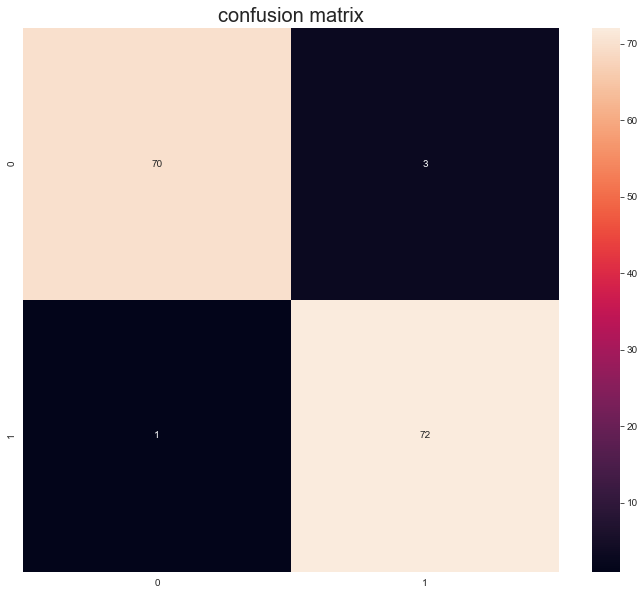

In [60]:
## plotting confusion matrix
plt.figure(figsize = (12,10))
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(cm_dtree,annot = True)
plt.title("confusion matrix", fontsize = 20)
plt.show()

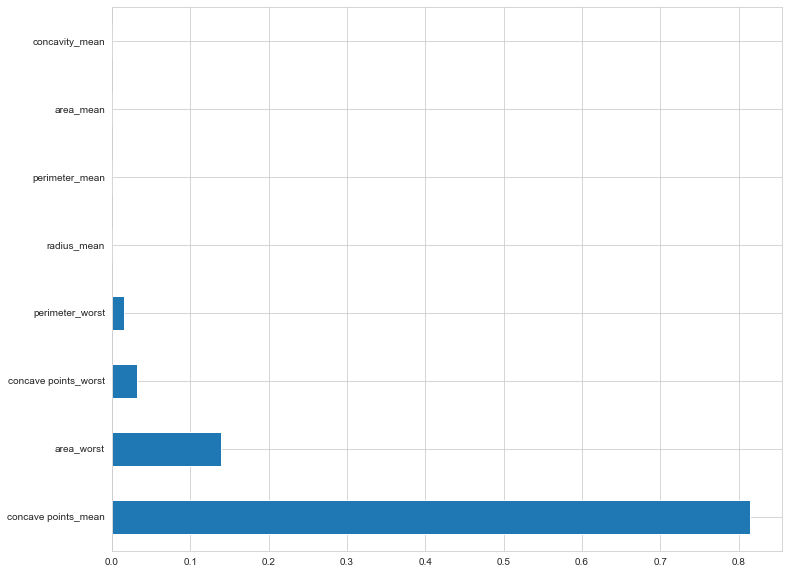

In [61]:
## Ploting Feature Importances
plt.figure(figsize = (12,10))
feat_importances = pd.Series(dtree.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = "barh")
plt.show()

## Random Forest

In [62]:
## Setting parameter of Random Forest using GridSearch CV
rf_param = {
    "n_estimators" : [100, 300, 500, 800, 1200],
    "max_depth" : [5, 8, 15, 25, 30],
    "min_samples_split" : [2, 5, 10, 15, 100],
    "min_samples_leaf" : [1, 2, 5, 10] 
}

rf = RandomForestClassifier()

g4 = GridSearchCV(rf, rf_param, cv = 3)

## fitting model
g4.fit(xtrain,ysm_train)

rf_best_params = g4.best_params_
print(rf_best_params)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [63]:
best_rf = RandomForestClassifier(**rf_best_params)
best_rf.fit(xtrain,ysm_train)

RandomForestClassifier(max_depth=30, min_samples_split=5)

In [64]:
rf_test = best_rf.score(xtest,ysm_test)
rf_train = best_rf.score(xtrain,ysm_train)

print("train = ", rf_train)
print("test = ", rf_test)

train =  0.9982332155477032
test =  0.9863013698630136


In [65]:
ypredict_forest = best_rf.predict(xtest)
tingkat_akurasi = best_rf.score(xtest,ysm_test)
print("tingkat akurasi  = ", tingkat_akurasi)

print("================================================================")
print("KLASIFIKASI REPORT")
print("================================================================")
cr_forest = classification_report(ysm_test,ypredict_forest)
cm_forest = confusion_matrix(ysm_test,ypredict_forest)
print(cr_forest)
print(cm_forest)

tingkat akurasi  =  0.9863013698630136
KLASIFIKASI REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.99      0.99      0.99        73

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[72  1]
 [ 1 72]]


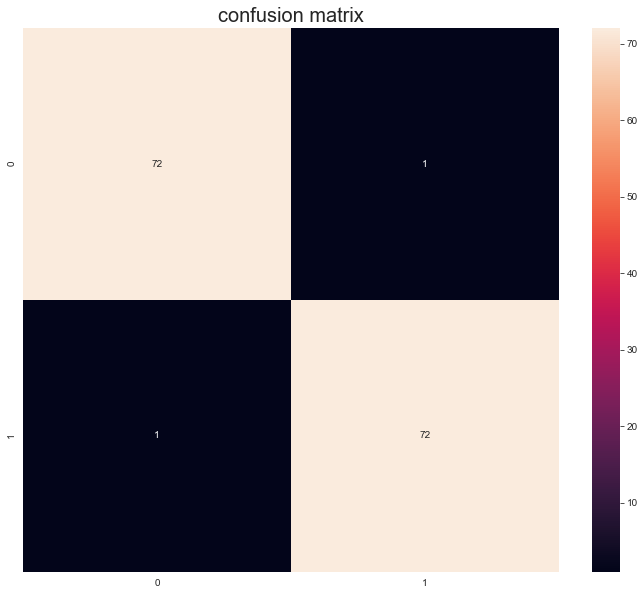

In [66]:
## plotting confusion matrix
plt.figure(figsize = (12,10))
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(cm_forest,annot = True)
plt.title("confusion matrix", fontsize = 20)
plt.show()

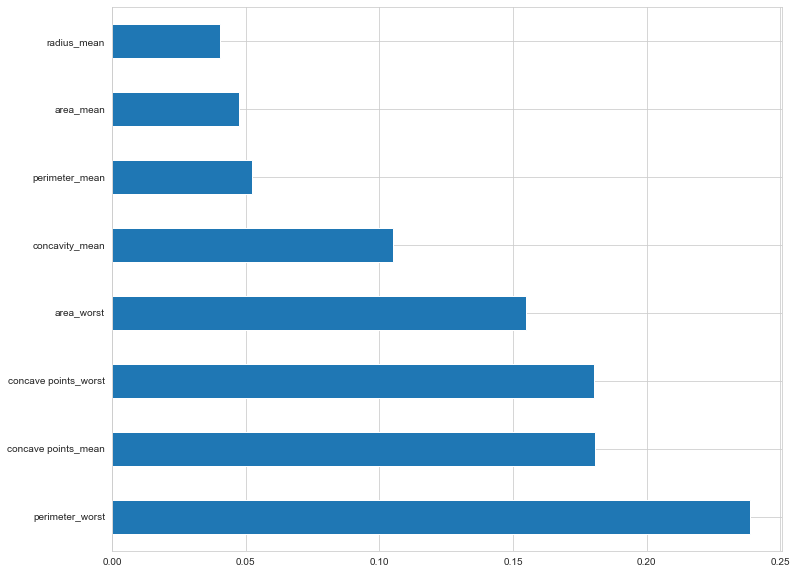

In [67]:
## Plotting feature importances from Random Forest Classifier
plt.figure(figsize = (12,10))
feat_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = "barh")
plt.show()